# The Impact of Geographic Division of U.S. on Flight Delay Patterns

# Name: Robin Nguyen

**This study analyzes the impact of geographic regions of airports in the U.S. on flight delay  patterns. By leveraging time series analysis, the research aims to uncover temporal and spatial trends, identify critical factors contributing to delays and evaluate how specific geographic divisions influence these patterns. The project uses Multiple Regression Model and ARMA Model.**

### Import libraries

In [ ]:
!pip install statsmodels
# Core Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical computations
import os
import glob
import re
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualization
from matplotlib.ticker import NullFormatter, FuncFormatter  # Formatting

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Ignore warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. DATA PROCESSING

## A. Testing Data

In [ ]:
# Input file paths
file_1 = r"C:\Users\nguyenr\OneDrive - Dickinson College\plane_delay_project\data\testing_data\combined_2023.csv"
file_2 = r"C:\Users\nguyenr\OneDrive - Dickinson College\plane_delay_project\data\testing_data\combined_2024.csv"

# Output file path
output_file = r"C:\Users\nguyenr\OneDrive - Dickinson College\plane_delay_project\data\testing_data\testing.csv"

# Combine files into one DataFrame
df_list = []

for file in [file_1, file_2]:
    # Read the entire file into a DataFrame
    df = pd.read_csv(file, low_memory=False)
    df_list.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to the output file
combined_df.to_csv(output_file, index=False)

print(f"Combined file saved to {output_file}")

Combined file saved to C:\Users\nguyenr\OneDrive - Dickinson College\plane_delay_project\data\testing_data\testing.csv


## B. Training Data

In [ ]:
# List CSV files
csv_files = [
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2018.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2019.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2020.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2021.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2022.csv"
]

# Output file path
output_file ="/content/drive/My Drive/Plane_delay_work/data/training_data/training.csv"

# Remove the output file if it already exists
if os.path.exists(output_file):
    os.remove(output_file)

# Define chunk size
chunk_size = 100_000

# Process files in chunks
for file in csv_files:
    print(f"Processing file: {file}")
    for chunk in pd.read_csv(file, chunksize=chunk_size, low_memory=False):
        # Append each chunk to the output file
        chunk.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)

print(f"All files combined and saved to {output_file}")

Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2018.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2019.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2020.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2021.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2022.csv
All files combined and saved to /content/drive/My Drive/Plane_delay_work/data/training_data/training.csv


In [ ]:
# List CSV1 files
csv_files1 = [
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2014.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2015.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2016.csv",
   "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_2017.csv"
]

# Output file path
output_file1 ="/content/drive/My Drive/Plane_delay_work/data/training_data/training1.csv"

# Remove the output file if it already exists
if os.path.exists(output_file1):
    os.remove(output_file1)

# Define chunk size
chunk_size = 100_000

# Process files in chunks
for file in csv_files1:
    print(f"Processing file: {file}")
    for chunk in pd.read_csv(file, chunksize=chunk_size, low_memory=False):
        # Append each chunk to the output file
        chunk.to_csv(output_file1, mode='a', header=not os.path.exists(output_file1), index=False)

print(f"All files combined and saved to {output_file1}")

Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2014.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2015.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2016.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/combined_2017.csv
All files combined and saved to /content/drive/My Drive/Plane_delay_work/data/training_data/training1.csv


In [ ]:
def combine_csv_chunks(file1, file2, output_file, chunksize=100_000):
    """Combines two large CSV files in chunks, handling potential header issues."""

    if os.path.exists(output_file):
        os.remove(output_file)  # Remove if exists to start fresh

    for file in [file1, file2]:
        print(f"Processing file: {file}")
        for chunk in pd.read_csv(file, chunksize=chunksize, low_memory=False):
            chunk.to_csv(output_file, mode='a', header=not os.path.exists(output_file) or os.stat(output_file).st_size == 0, index=False)
    print(f"Files combined and saved to {output_file}")

# Example usage:
file1_path = "/content/drive/My Drive/Plane_delay_work/data/training_data/training1.csv"
file2_path = "/content/drive/My Drive/Plane_delay_work/data/training_data/training.csv"
output_path = "/content/drive/My Drive/Plane_delay_work/data/training_data/combined_training.csv"

combine_csv_chunks(file1_path, file2_path, output_path)


Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/training1.csv
Processing file: /content/drive/My Drive/Plane_delay_work/data/training_data/training.csv
Files combined and saved to /content/drive/My Drive/Plane_delay_work/data/training_data/combined_training.csv


## 2. Clean Data & Explainatory Data Analysis (EDA)

### A. Testing data


In [ ]:
# Import df
file_path = "/content/drive/My Drive/Plane_delay_work/data/testing_data/testing.csv"
test_df= pd.read_csv(file_path)

In [ ]:
# Create a copy
testing_df = test_df.copy()

In [ ]:
# View columns
testing_df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'FLIGHTS', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [ ]:
# Create a new dummy variable from testing_df from 'DAY_OF_WEEK'
# where Friday and weekends are set to 1, and all other days are set to 0.
# The number of the week starts from 1 and ends at 7

testing_df['IS_WEEKEND'] = testing_df['DAY_OF_WEEK'].apply(lambda x: 1 if x in [5, 6, 7] else 0)


In [ ]:
# Drop unnesscary columns
testing_df = testing_df.drop(['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED'], axis=1)

In [ ]:
# Define the mapping
fips_to_region = {
    1 : [9, 23, 25, 33, 44, 50, 34, 36, 42],
    2 : [17, 18, 19, 20, 26, 27, 29, 31, 38, 39, 46, 55],
    3 : [1, 5, 10, 12, 13, 21, 22, 24, 28, 37, 40, 45, 47, 48, 51, 54, 11],
    4 : [2, 4, 6, 8, 15, 16, 30, 32, 35, 41, 49, 53, 56],
}

# Create a region mapping
region_mapping = {}
for region, codes in fips_to_region.items():
    for code in codes:
        region_mapping[code] = region

# Map the regions directly
testing_df['ORIGIN_REGION'] = testing_df['ORIGIN_STATE_FIPS'].map(region_mapping)
testing_df['DEST_REGION'] = testing_df['DEST_STATE_FIPS'].map(region_mapping)

In [ ]:
# Fill N/A rows
columns_to_fill = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
testing_df[columns_to_fill] = testing_df[columns_to_fill].fillna(0)

In [ ]:
# View df
testing_df.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION
0,2023,1,1,7,9E,20363,N131EV,12478,1247805,31703,...,93.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0
1,2023,1,1,7,9E,20363,N131EV,12478,1247805,31703,...,159.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0
2,2023,1,1,7,9E,20363,N131EV,13930,1393008,30977,...,134.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0
3,2023,1,1,7,9E,20363,N133EV,10135,1013506,30135,...,135.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,3.0
4,2023,1,1,7,9E,20363,N133EV,10397,1039707,30397,...,109.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2.0


In [ ]:
# View df
testing_df.tail(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION
13884216,2024,12,31,2,YX,20452,N880RW,12953,1295304,31703,...,111.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0
13884217,2024,12,31,2,YX,20452,N882RW,11986,1198603,31986,...,119.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0
13884218,2024,12,31,2,YX,20452,N882RW,12953,1295304,31703,...,123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0
13884219,2024,12,31,2,YX,20452,N882RW,12953,1295304,31703,...,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0
13884220,2024,12,31,2,YX,20452,N882RW,14576,1457607,34576,...,64.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0


In [ ]:
# View shape of df
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())

# Check shape, datatypes, and na of df
check_df(testing_df)


Shape
(13884221, 34)

Types
YEAR                       int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
TAIL_NUM                  object
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN_STATE_FIPS          int64
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST_STATE_FIPS            int64
DEST_WAC                   int64
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY                float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY                float64
CRS_ELAPSED_TIME         float64
ACTUAL_ELAPSED_TIME      float64
FLIGHTS                  float64
CARRIER_DELAY            float64
WEATHER_DELAY            float64
NAS_DELAY                float64
SECURITY_DELAY

In [ ]:
# Check the number of duplicated rows
total_duplicates = testing_df.duplicated().sum()

print('Total duplicated rows:', total_duplicates)

Total duplicated rows: 1730292


In [ ]:
# Drop non-numerical columns
df_numeric_testing = testing_df.select_dtypes(include=['number'])

# Display the resulting DataFrame
print(df_numeric_testing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13884221 entries, 0 to 13884220
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   MONTH                  int64  
 2   DAY_OF_MONTH           int64  
 3   DAY_OF_WEEK            int64  
 4   OP_CARRIER_AIRLINE_ID  int64  
 5   ORIGIN_AIRPORT_ID      int64  
 6   ORIGIN_AIRPORT_SEQ_ID  int64  
 7   ORIGIN_CITY_MARKET_ID  int64  
 8   ORIGIN_STATE_FIPS      int64  
 9   ORIGIN_WAC             int64  
 10  DEST_AIRPORT_ID        int64  
 11  DEST_AIRPORT_SEQ_ID    int64  
 12  DEST_CITY_MARKET_ID    int64  
 13  DEST_STATE_FIPS        int64  
 14  DEST_WAC               int64  
 15  CRS_DEP_TIME           int64  
 16  DEP_TIME               float64
 17  DEP_DELAY              float64
 18  CRS_ARR_TIME           int64  
 19  ARR_TIME               float64
 20  ARR_DELAY              float64
 21  CRS_ELAPSED_TIME       float64
 22  ACTUAL_ELAPSED_T

In [ ]:
# Drop duplicated rows
df_numeric_testing = df_numeric_testing.drop_duplicates()

In [ ]:
# Drop missing data
df_numeric_testing = df_numeric_testing.dropna()

### Shift data to use today's independent variable as yesterday's value

In [ ]:
# Shift testing data
df_shift_testing = df_numeric_testing.copy()

In [ ]:
# Sort data
df_shift_testing = df_shift_testing.sort_values(by=["YEAR", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK"])

In [ ]:
# Group data to shift
grouped = df_shift_testing.groupby(["ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID"])

In [ ]:
# Shift data
df_shift_testing["shifted_arr_delay"] = grouped["ARR_DELAY"].shift(-1)
df_shift_testing["shifted_dep_delay"] = grouped["DEP_DELAY"].shift(-1)

In [ ]:
# Drop missing data
df_shift_testing = df_shift_testing.dropna()

In [ ]:
# drop ARR_DELAY and DEP_DELAY
df_shift_testing = df_shift_testing.drop(['ARR_DELAY', 'DEP_DELAY'], axis=1)

In [ ]:
# rename shifted_arr_delay and shifted_dep_delay to ARR_DELAY and DEP_DELAY
df_shift_testing.rename(columns={'shifted_arr_delay': 'ARR_DELAY', 'shifted_dep_delay': 'DEP_DELAY'}, inplace=True)

In [ ]:
# View the df
df_shift_testing.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION,ARR_DELAY,DEP_DELAY
0,2023,1,1,7,20363,12478,1247805,31703,36,22,...,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,-4.0,-8.0
1,2023,1,1,7,20363,12478,1247805,31703,36,22,...,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0,-41.0,-5.0
2,2023,1,1,7,20363,13930,1393008,30977,17,41,...,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0,-29.0,-5.0
3,2023,1,1,7,20363,10135,1013506,30135,42,23,...,0.0,0.0,0.0,0.0,0.0,1,1.0,3.0,-32.0,-5.0
4,2023,1,1,7,20363,10397,1039707,30397,13,34,...,0.0,0.0,0.0,0.0,0.0,1,3.0,2.0,-13.0,-3.0


In [ ]:
# View the df
df_shift_testing.tail(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION,ARR_DELAY,DEP_DELAY
13884175,2024,12,31,2,20452,12339,1233904,32337,18,42,...,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,-12.0,3.0
13884181,2024,12,31,2,20452,12339,1233904,32337,18,42,...,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,-7.0,-8.0
13884183,2024,12,31,2,20452,12953,1295304,31703,36,22,...,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0,-22.0,-5.0
13884184,2024,12,31,2,20452,12953,1295304,31703,36,22,...,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0,-35.0,-7.0
13884185,2024,12,31,2,20452,11066,1106606,31066,39,44,...,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,-28.0,-13.0


In [ ]:
# save df_shift_testing to google drive
df_shift_testing.to_csv('/content/drive/My Drive/Plane_delay_work/data/testing_data/df_shift_testing.csv', index=False)

## B. Training Dataframe

In [67]:
# Import df
file_path_1 = '/content/drive/My Drive/Plane_delay_work/data/training_data/combined_training.csv'
train_df= pd.read_csv(file_path_1)

In [ ]:
# Create a copy
training_df = train_df.copy()

In [ ]:
# View columns
training_df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'FLIGHTS', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [ ]:
# Create a new dummy variable where Friday and weekends are set to 1, and all other days are set to 0.
training_df['IS_WEEKEND'] = training_df['DAY_OF_WEEK'].apply(lambda x: 1 if x in [5, 6, 7] else 0)

In [ ]:
# Define the mapping
fips_to_region = {
    1 : [9, 23, 25, 33, 44, 50, 34, 36, 42],
    2 : [17, 18, 19, 20, 26, 27, 29, 31, 38, 39, 46, 55],
    3 : [1, 5, 10, 12, 13, 21, 22, 24, 28, 37, 40, 45, 47, 48, 51, 54, 11],
    4 : [2, 4, 6, 8, 15, 16, 30, 32, 35, 41, 49, 53, 56],
}

# Create a region mapping
region_mapping = {}
for region, codes in fips_to_region.items():
    for code in codes:
        region_mapping[code] = region

# Map the regions directly
training_df['ORIGIN_REGION'] = training_df['ORIGIN_STATE_FIPS'].map(region_mapping)
training_df['DEST_REGION'] = training_df['DEST_STATE_FIPS'].map(region_mapping)

In [ ]:
# since there are earlier than intended flights, these columns are blank /nan. need to fill with 0
columns_to_fill = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
training_df[columns_to_fill] = training_df[columns_to_fill].fillna(0)

In [ ]:
# View df
training_df.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION
0,2014,1,1,3,AA,19805,N001AA,11298,1129803,30194,...,68.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3.0,2.0
1,2014,1,1,3,AA,19805,N001AA,11298,1129803,30194,...,83.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3.0
2,2014,1,1,3,AA,19805,N001AA,12278,1227802,30928,...,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2.0,3.0
3,2014,1,1,3,AA,19805,N001AA,13244,1324402,33244,...,116.0,1.0,31.0,0.0,11.0,0.0,0.0,0,3.0,3.0
4,2014,1,1,3,AA,19805,N001AA,13256,1325602,33256,...,88.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3.0


In [ ]:
# View df
training_df.tail(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION
54951886,2022,12,31,6,YX,20452,N882RW,12953,1295304,31703,...,98.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0
54951887,2022,12,31,6,YX,20452,N979RP,11003,1100303,31003,...,77.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0
54951888,2022,12,31,6,YX,20452,N979RP,13930,1393008,30977,...,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0
54951889,2022,12,31,6,YX,20452,N979RP,13930,1393008,30977,...,136.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0
54951890,2022,12,31,6,YX,20452,N979RP,14321,1432105,34321,...,175.0,1.0,0.0,0.0,25.0,0.0,0.0,1,1.0,2.0


In [ ]:
# Check shape, datatypes, and na of df
check_df(training_df)


Shape
(54951891, 37)

Types
YEAR                       int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
TAIL_NUM                  object
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN_STATE_FIPS          int64
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST_STATE_FIPS            int64
DEST_WAC                   int64
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY                float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY                float64
CANCELLED                float64
CANCELLATION_CODE         object
DIVERTED                 float64
CRS_ELAPSED_TIME         float64
ACTUAL_ELAPSED_TIME      float64
FLIGHTS                  float64
CARRIER_DELAY 

In [ ]:
# Check the number of duplicated rows
total_duplicates_1 = training_df.duplicated().sum()

print('Total duplicated rows:', total_duplicates_1)

Total duplicated rows: 1405094


In [ ]:
# Drop non-numerical columns
df_numeric_training = training_df.select_dtypes(include=['number'])

# Display the resulting DataFrame
print(df_numeric_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54951891 entries, 0 to 54951890
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   MONTH                  int64  
 2   DAY_OF_MONTH           int64  
 3   DAY_OF_WEEK            int64  
 4   OP_CARRIER_AIRLINE_ID  int64  
 5   ORIGIN_AIRPORT_ID      int64  
 6   ORIGIN_AIRPORT_SEQ_ID  int64  
 7   ORIGIN_CITY_MARKET_ID  int64  
 8   ORIGIN_STATE_FIPS      int64  
 9   ORIGIN_WAC             int64  
 10  DEST_AIRPORT_ID        int64  
 11  DEST_AIRPORT_SEQ_ID    int64  
 12  DEST_CITY_MARKET_ID    int64  
 13  DEST_STATE_FIPS        int64  
 14  DEST_WAC               int64  
 15  CRS_DEP_TIME           int64  
 16  DEP_TIME               float64
 17  DEP_DELAY              float64
 18  CRS_ARR_TIME           int64  
 19  ARR_TIME               float64
 20  ARR_DELAY              float64
 21  CANCELLED              float64
 22  DIVERTED        

In [ ]:
# Drop duplicated rows
df_numeric_training = df_numeric_training.drop_duplicates()

In [ ]:
# Drop missing data
df_numeric_training = df_numeric_training.dropna()

In [ ]:
# drop unecessary columns
df_numeric_training = df_numeric_training.drop(['CANCELLED', 'DIVERTED','FLIGHTS'], axis=1)
df_numeric_training.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS',
       'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'IS_WEEKEND', 'ORIGIN_REGION', 'DEST_REGION'],
      dtype='object')

### Shift data to use today's independent variable as yesterday's value

In [ ]:
# Shift testing data
df_shift_training = df_numeric_training.copy()

In [ ]:
df_shift_training.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION
0,2014,1,1,3,19805,11298,1129803,30194,48,74,...,75.0,68.0,0.0,0.0,0.0,0.0,0.0,0,3.0,2.0
1,2014,1,1,3,19805,11298,1129803,30194,48,74,...,90.0,83.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3.0
2,2014,1,1,3,19805,12278,1227802,30928,20,62,...,80.0,72.0,0.0,0.0,0.0,0.0,0.0,0,2.0,3.0
3,2014,1,1,3,19805,13244,1324402,33244,47,54,...,105.0,116.0,31.0,0.0,11.0,0.0,0.0,0,3.0,3.0
4,2014,1,1,3,19805,13256,1325602,33256,48,74,...,95.0,88.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3.0


In [ ]:
# Sort data
df_shift_training = df_shift_training.sort_values(by=["YEAR", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK"])

In [ ]:
# Group data to shift
grouped = df_shift_training.groupby(["ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID"])

In [ ]:
# Shift data
df_shift_training["shifted_arr_delay"] = grouped["ARR_DELAY"].shift(-1)
df_shift_training["shifted_dep_delay"] = grouped["DEP_DELAY"].shift(-1)

In [ ]:
# Drop missing data
df_shift_training = df_shift_training.dropna()

In [ ]:
# drop ARR_DELAY and DEP_DELAY
df_shift_training = df_shift_training.drop(['ARR_DELAY', 'DEP_DELAY'], axis=1)

In [ ]:
# rename shifted_arr_delay and shifted_dep_delay to ARR_DELAY and DEP_DELAY
df_shift_training.rename(columns={'shifted_arr_delay': 'ARR_DELAY', 'shifted_dep_delay': 'DEP_DELAY'}, inplace=True)

In [ ]:
# Shifted array results
df_shift_training.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,IS_WEEKEND,ORIGIN_REGION,DEST_REGION,ARR_DELAY,DEP_DELAY
0,2014,1,1,3,19805,11298,1129803,30194,48,74,...,0.0,0.0,0.0,0.0,0.0,0,3.0,2.0,21.0,16.0
1,2014,1,1,3,19805,11298,1129803,30194,48,74,...,0.0,0.0,0.0,0.0,0.0,0,3.0,3.0,-21.0,-9.0
2,2014,1,1,3,19805,12278,1227802,30928,20,62,...,0.0,0.0,0.0,0.0,0.0,0,2.0,3.0,2.0,9.0
3,2014,1,1,3,19805,13244,1324402,33244,47,54,...,31.0,0.0,11.0,0.0,0.0,0,3.0,3.0,41.0,39.0
4,2014,1,1,3,19805,13256,1325602,33256,48,74,...,0.0,0.0,0.0,0.0,0.0,0,3.0,3.0,-23.0,-7.0


In [ ]:
df_shift_training.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS',
       'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'IS_WEEKEND', 'ORIGIN_REGION', 'DEST_REGION', 'ARR_DELAY', 'DEP_DELAY'],
      dtype='object')

In [ ]:
# saved df_shift_training to google drive
df_shift_training.to_csv('/content/drive/My Drive/Plane_delay_work/data/training_data/df_shift_training.csv', index=False)

## 3. Correlation Coefficients

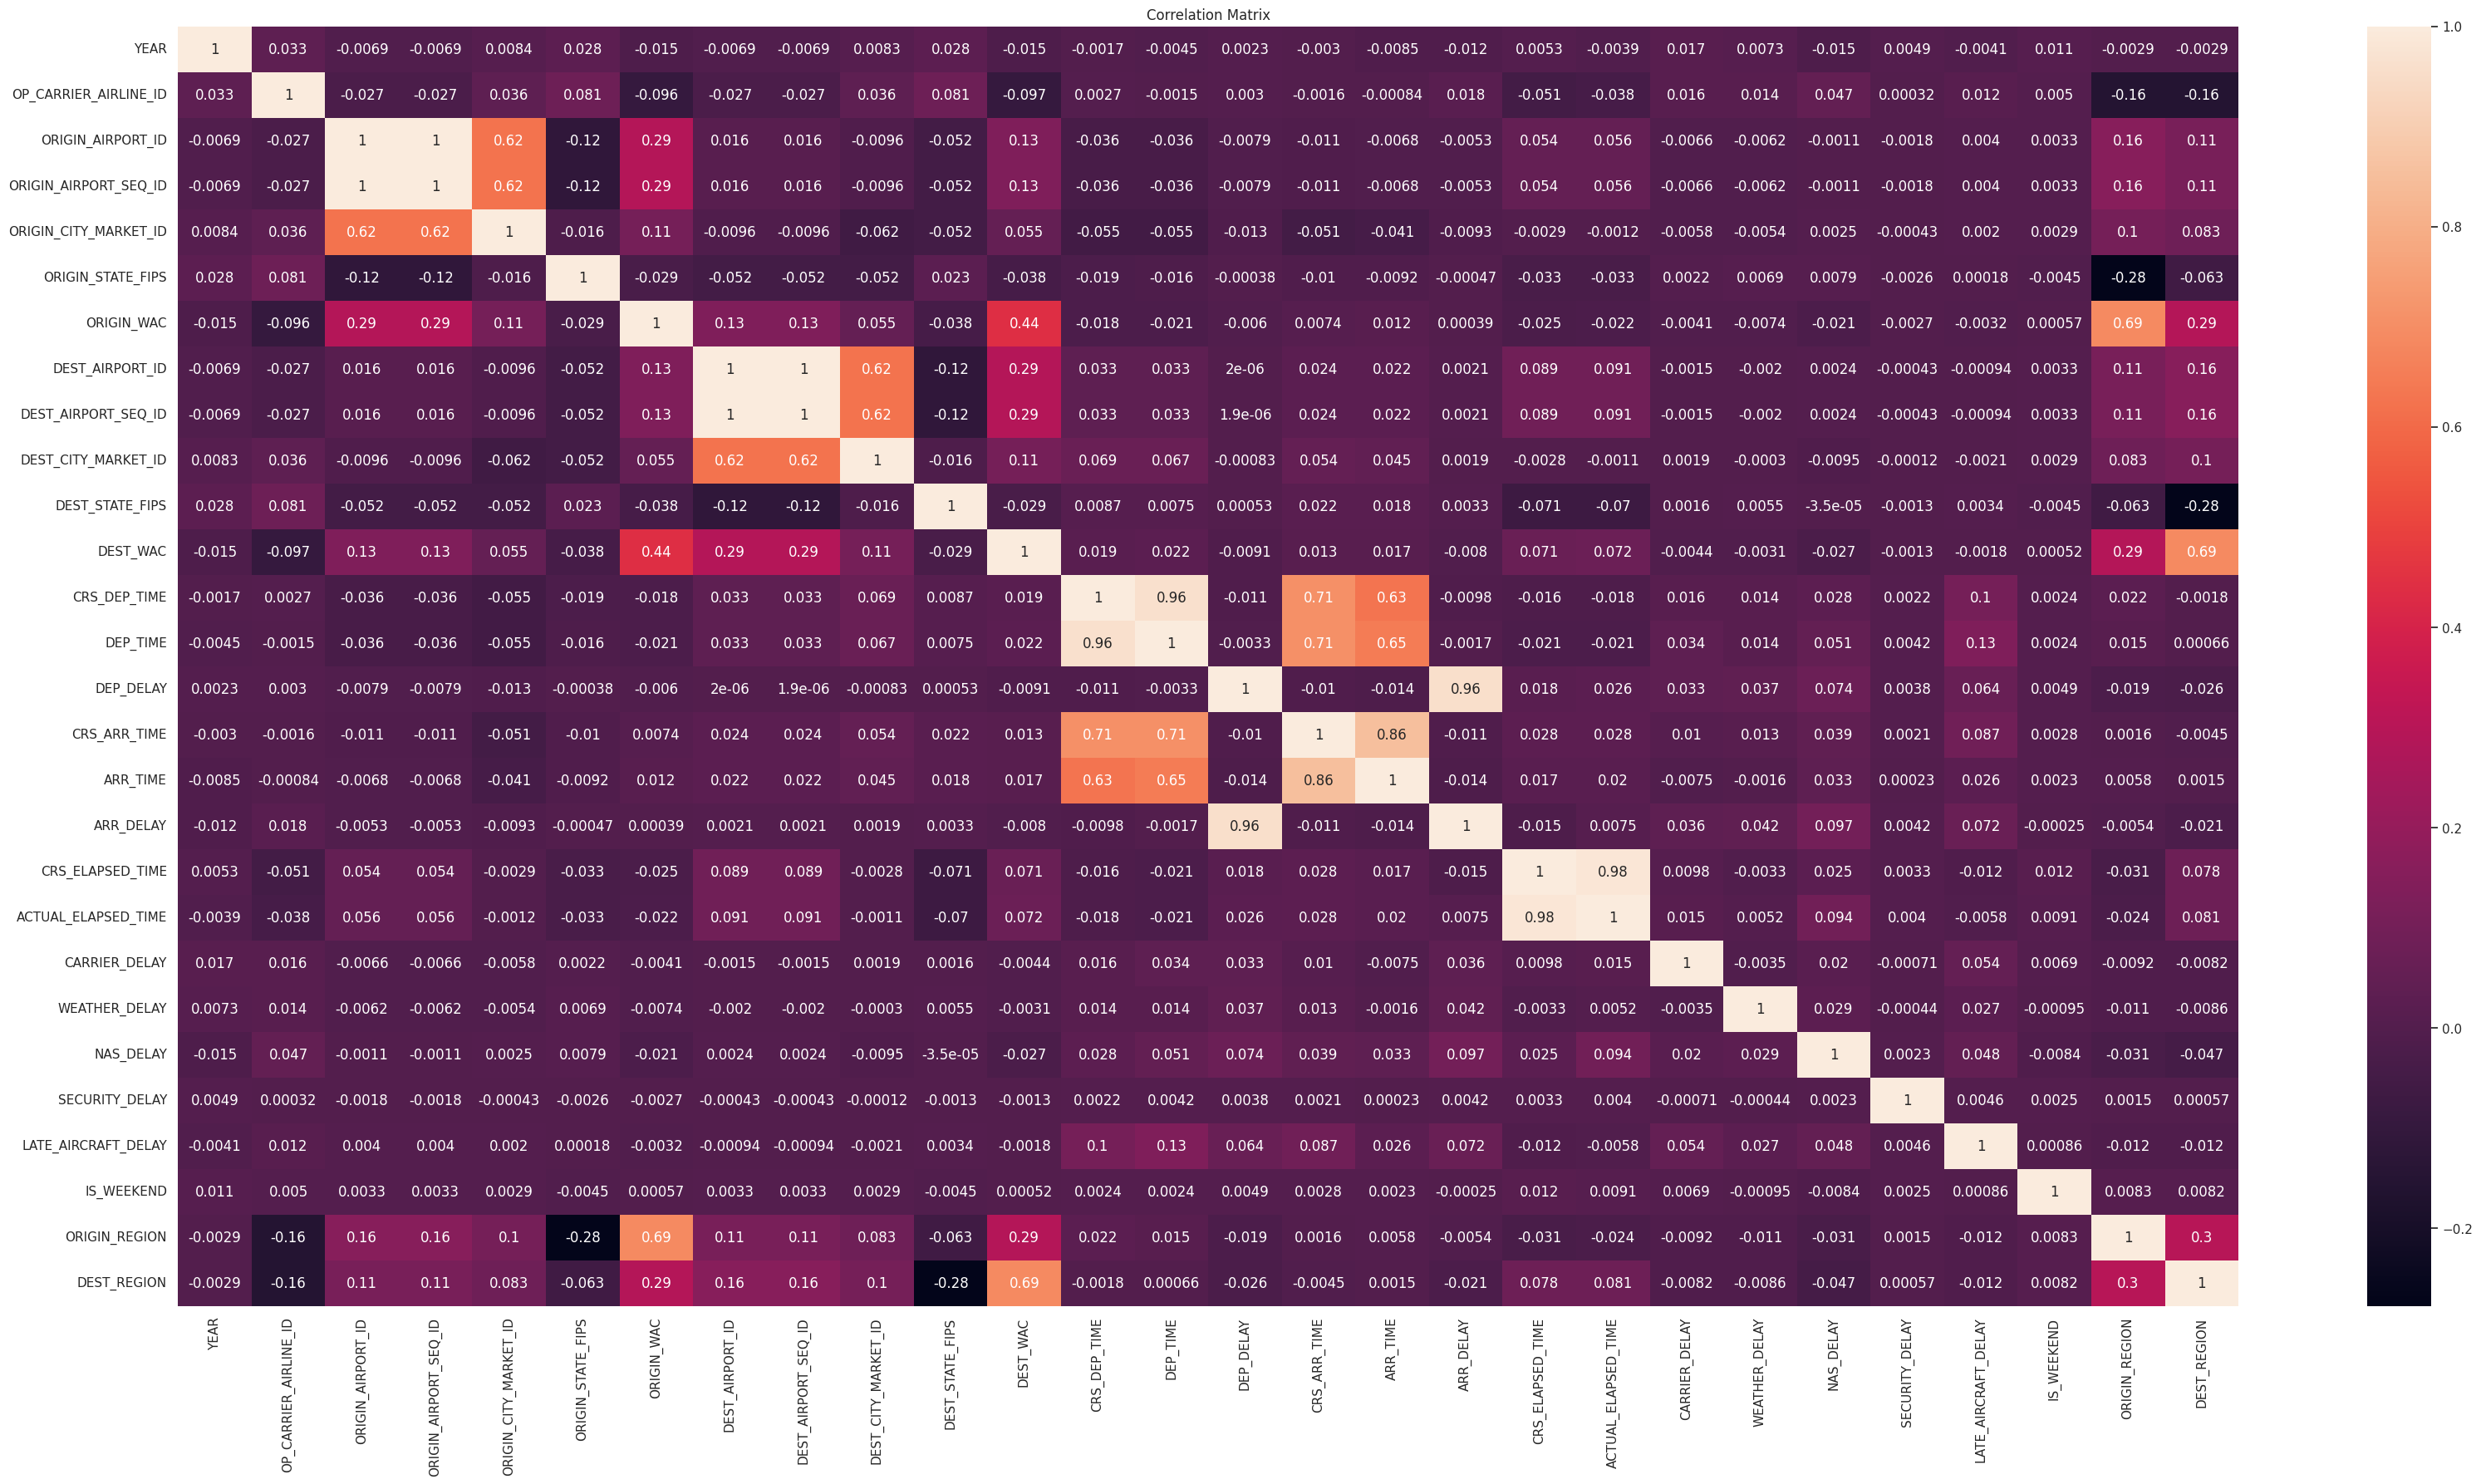

In [ ]:
# Create heatmap
heat_corr = df_shift_training[['YEAR', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'IS_WEEKEND',
       'ORIGIN_REGION', 'DEST_REGION']].corr()

plt.figure(figsize=(40,20))
sns.set(rc={ 'figure.facecolor':'w'})
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")

# Save the heatmap as a PNG file
plt.savefig('/content/drive/My Drive/Plane_delay_work/correlation_heatmap.png', format='png')
plt.show()

## 4. Multiple Regression Model
## 4.1 Dependent Variable: ARR_DELAY
### A. Training Set

In [ ]:
# create arr_delay_training_df and dep_delay_training_df for training
# Columns for arr_delay_training_df
arr_delay_columns = [
    'ARR_DELAY', 'DEST_REGION', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'IS_WEEKEND',
    'ACTUAL_ELAPSED_TIME', 'ARR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
    'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
]



# Create the DataFrame
arr_delay_training_df = df_shift_training[arr_delay_columns]




In [ ]:
# View df
arr_delay_training_df.head()

,ARR_DELAY,DEST_REGION,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,IS_WEEKEND,ACTUAL_ELAPSED_TIME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,21.0,2.0,12278,19805,0,68.0,1412.0,0.0,0.0,0.0,0.0,0.0
1,-21.0,3.0,13256,19805,0,83.0,1826.0,0.0,0.0,0.0,0.0,0.0
2,2.0,3.0,11298,19805,0,72.0,1601.0,0.0,0.0,0.0,0.0,0.0
3,41.0,3.0,11298,19805,0,116.0,912.0,31.0,0.0,11.0,0.0,0.0
4,-23.0,3.0,11298,19805,0,88.0,2037.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#View Columns
arr_delay_training_df.columns

Index(['ARR_DELAY', 'DEST_REGION', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID',
       'IS_WEEKEND', 'ACTUAL_ELAPSED_TIME', 'ARR_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

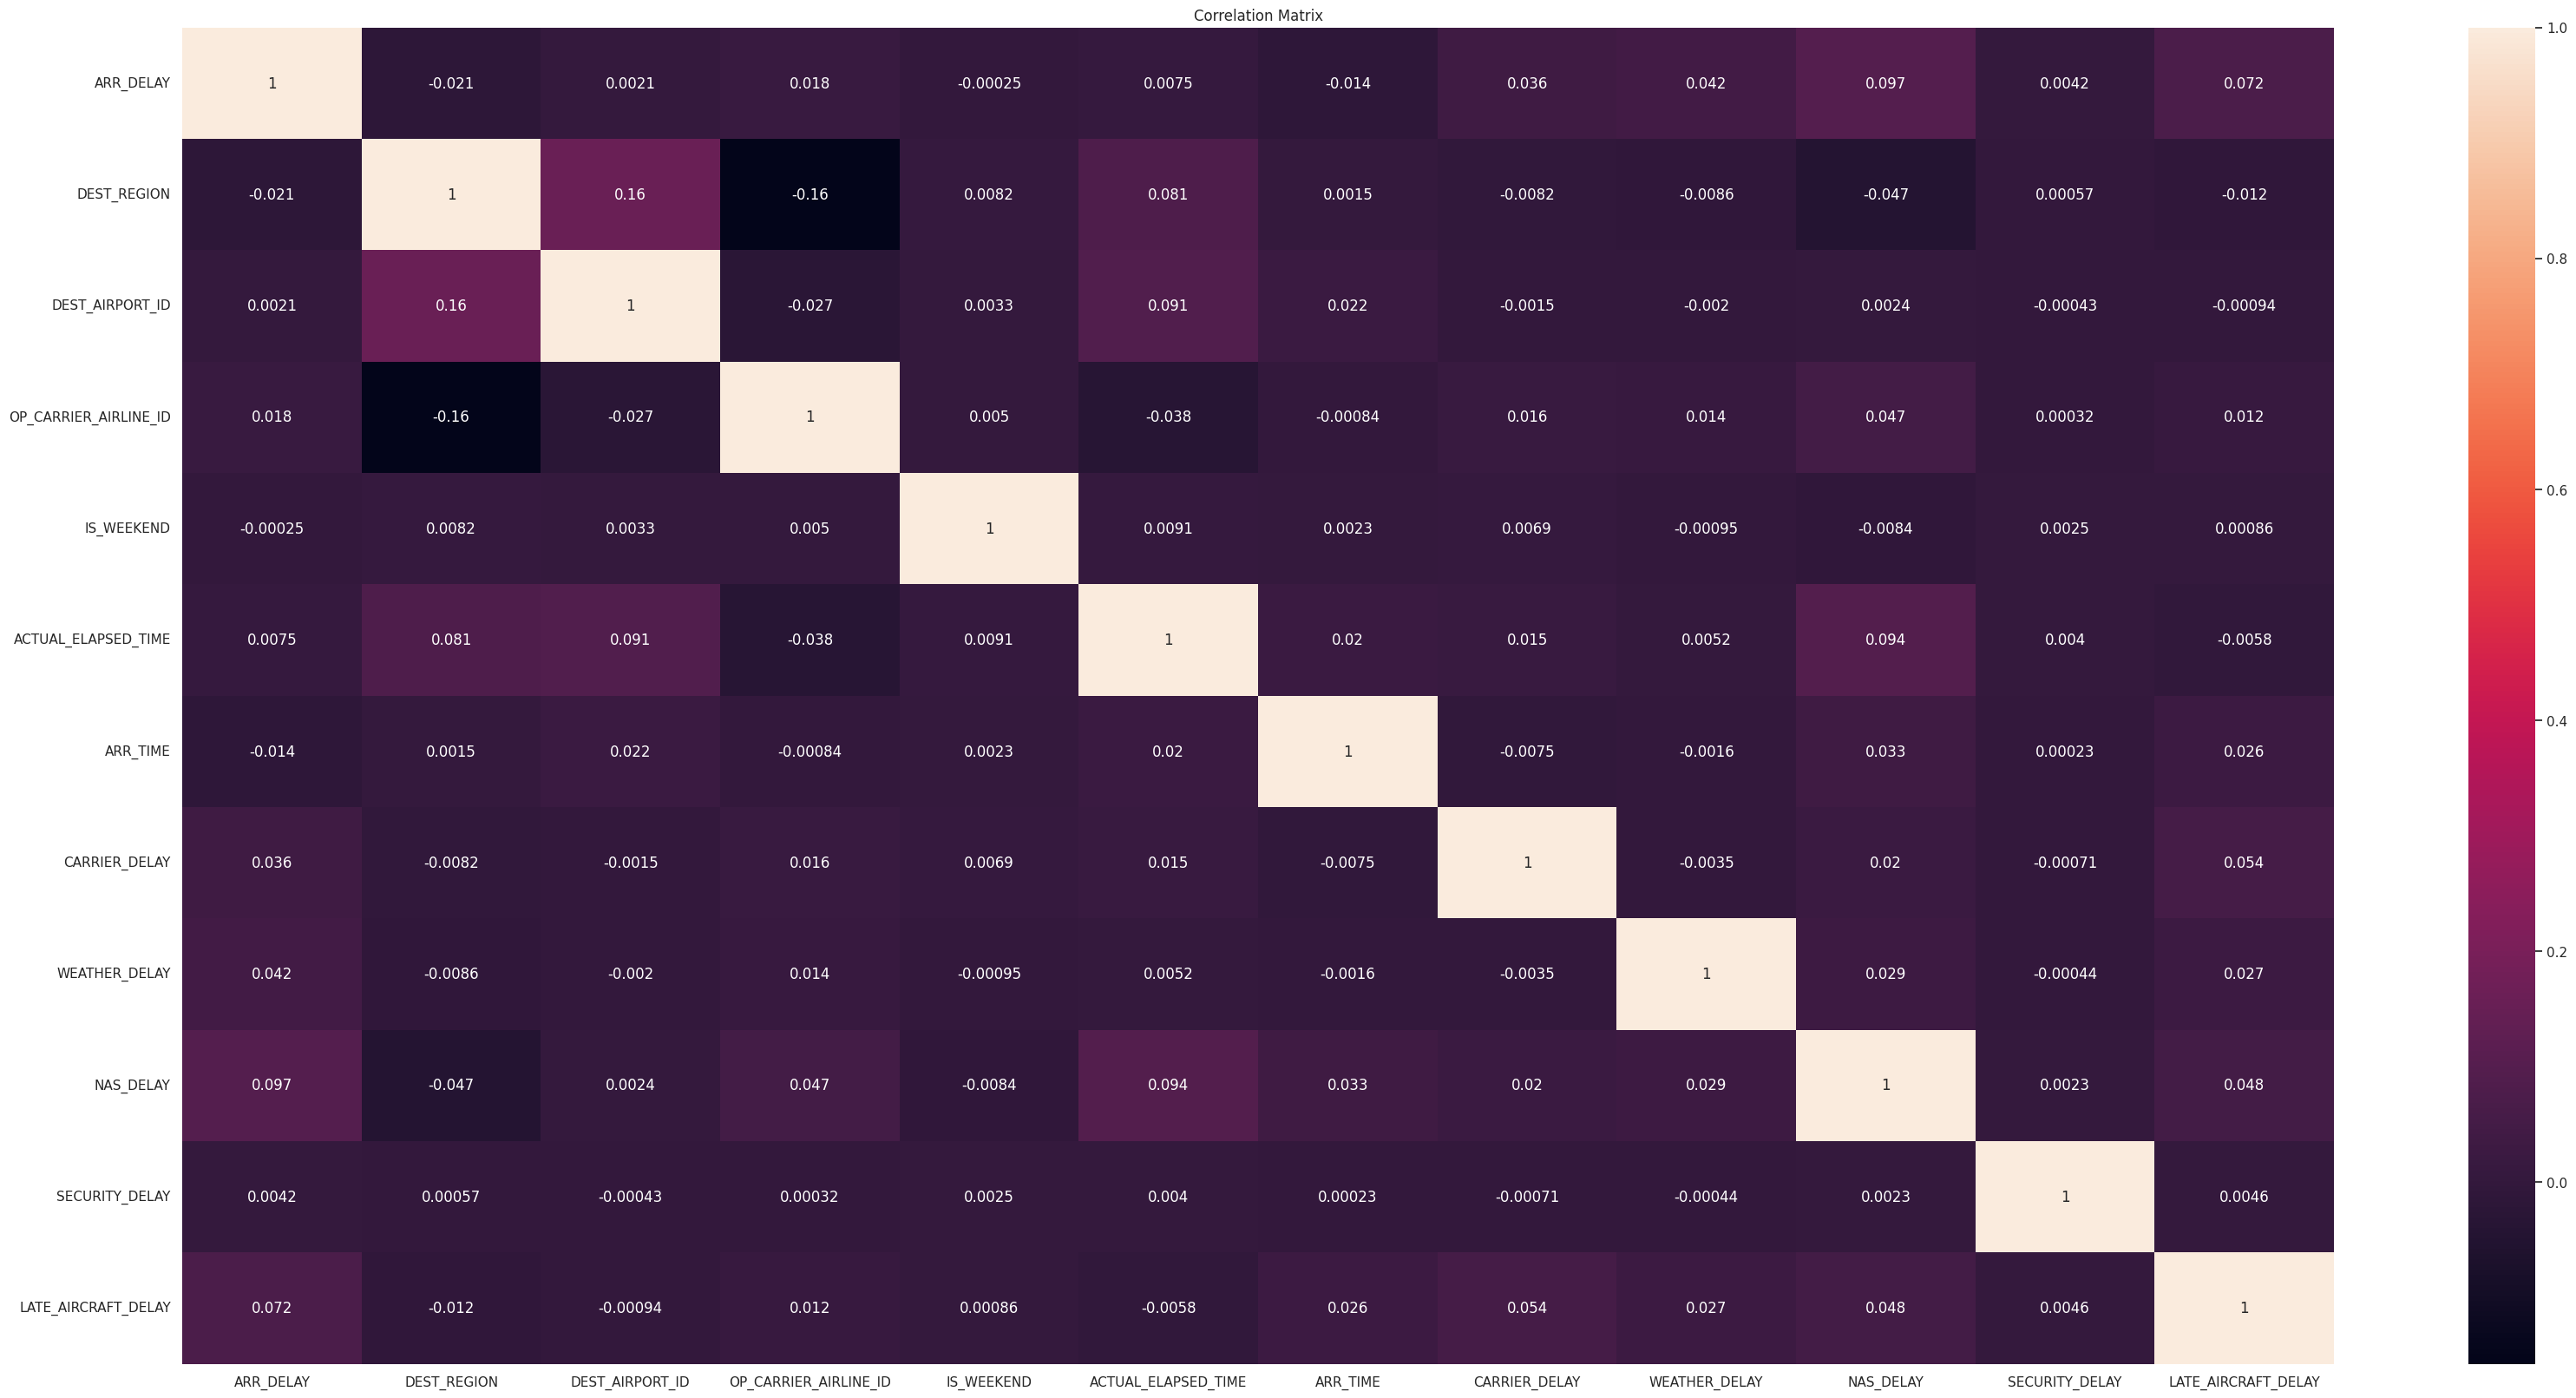

In [ ]:
# Create heatmap for arr_delay_training_df
heat_corr = arr_delay_training_df[['ARR_DELAY', 'DEST_REGION', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID',
       'IS_WEEKEND', 'ACTUAL_ELAPSED_TIME', 'ARR_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].corr()

plt.figure(figsize=(40,20))
sns.set(rc={ 'figure.facecolor':'w'})
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")

# Save the heatmap as a PNG file
plt.savefig('/content/drive/My Drive/Plane_delay_work/arr_delay_correlation_heatmap.png', format='png')
plt.show()

In [ ]:
# Define the independent (X) and dependent (y) variables
X_train = arr_delay_training_df.drop(columns=['ARR_DELAY'])  # All columns except ARR_DELAY
y_train = arr_delay_training_df['ARR_DELAY']  # Target variable

# Create and train the model
X_train = sm.add_constant(X_train)
model_arr = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model_arr.summary())

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                 8.129e+04
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        22:23:57   Log-Likelihood:            -2.7080e+08
No. Observations:            51678570   AIC:                         5.416e+08
Df Residuals:                51678558   BIC:                         5.416e+08
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -17.84

### B. Test set

**BASE FOR THE TEST SET**

In [ ]:
# Create the DataFrame
arr_delay_testing_df = df_shift_testing[arr_delay_columns]

In [ ]:
X_test = arr_delay_testing_df.drop(columns=['ARR_DELAY'])  # All columns except ARR_DELAY
y_test = arr_delay_testing_df[['ARR_DELAY', 'OP_CARRIER_AIRLINE_ID']]  # Target variable

# Make constant
X_test = sm.add_constant(X_test)

### Predict Delta Airline in 2023-2024 (high-end)

In [ ]:
# Filter the airline name
X_test_delta = X_test[X_test['OP_CARRIER_AIRLINE_ID']==19790]

In [ ]:
# Filter the airline name
y_test_delta = y_test[y_test['OP_CARRIER_AIRLINE_ID']==19790]

# Drop unncessary column
y_test_delta = y_test_delta.drop(columns=['OP_CARRIER_AIRLINE_ID'])

In [ ]:
# Predict the value
y_pred_delta = model_arr.predict(X_test_delta)

In [ ]:
# Filter the airline name
df_delta_test = arr_delay_testing_df[arr_delay_testing_df['OP_CARRIER_AIRLINE_ID']==19790]

In [ ]:
# Compare the actual and predicted values
df_concat = pd.concat([df_delta_test, y_pred_delta], axis=1)

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# View df
df_concat.head()

,ARR_DELAY,DEST_REGION,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,IS_WEEKEND,ACTUAL_ELAPSED_TIME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,0
3918,-11.0,3.0,13204,19790,1,190.0,1011.0,0.0,0.0,18.0,0.0,0.0,8.320000
3919,-12.0,2.0,13487,19790,1,216.0,1349.0,0.0,0.0,5.0,0.0,10.0,6.122901
3920,18.0,4.0,14107,19790,1,217.0,1736.0,0.0,0.0,13.0,0.0,15.0,7.089743
3921,-10.0,2.0,13487,19790,1,162.0,2232.0,0.0,0.0,0.0,0.0,0.0,1.963345
3922,-13.0,3.0,14027,19790,1,171.0,1409.0,0.0,0.0,0.0,0.0,0.0,2.707618


In [ ]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_delta, y_pred_delta))

Mean Squared Error (MSE): 2663.31086619786


In [ ]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_delta, y_pred_delta))

Mean Absolute Error (MAE): 24.051885905380267


### Predict Frontier Airline in 2023-2024 (low-end)

In [ ]:
# Filter the airline name
X_test_frontier = X_test[X_test['OP_CARRIER_AIRLINE_ID']==20436]

In [ ]:
# Filter the airline name
y_test_frontier = y_test[y_test['OP_CARRIER_AIRLINE_ID']==20436]

# Drop unncessary column
y_test_frontier = y_test_frontier.drop(columns=['OP_CARRIER_AIRLINE_ID'])

In [ ]:
# Predict the value
y_pred_frontier = model_arr.predict(X_test_frontier)

In [ ]:
# Filter the airline name
df_frontier_test = arr_delay_testing_df[arr_delay_testing_df['OP_CARRIER_AIRLINE_ID']==20436]

In [ ]:
# Compare the actual and predicted values
df_concat2 = pd.concat([df_frontier_test, y_pred_frontier], axis=1)

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# View df
df_concat2.head()

,ARR_DELAY,DEST_REGION,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,IS_WEEKEND,ACTUAL_ELAPSED_TIME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,0
5780,-34.0,3.0,13204,20436,1,140.0,1854.0,16.0,0.0,17.0,0.0,0.0,8.193367
5781,71.0,2.0,11042,20436,1,173.0,1533.0,0.0,0.0,45.0,0.0,0.0,16.189777
5782,61.0,3.0,13495,20436,1,110.0,2042.0,13.0,0.0,2.0,0.0,16.0,5.604503
5783,175.0,3.0,10397,20436,1,110.0,10.0,0.0,0.0,17.0,0.0,24.0,13.099338
5784,-15.0,2.0,13342,20436,1,162.0,2132.0,0.0,0.0,19.0,0.0,24.0,11.304994


In [ ]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_frontier, y_pred_frontier))

Mean Squared Error (MSE): 3612.540117903184


In [ ]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_frontier, y_pred_frontier))

Mean Absolute Error (MAE): 28.58118567795975


### 4.2 Dependent Variable: DEP_DELAY

In [ ]:
# Columns for dep_delay_training_df
dep_delay_columns = [
    'DEP_DELAY', 'ORIGIN_REGION', 'ORIGIN_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'IS_WEEKEND',
    'ACTUAL_ELAPSED_TIME', 'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
    'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
]

# Create DataFrame
dep_delay_training_df = df_shift_training[dep_delay_columns]


In [ ]:
# View df
dep_delay_training_df.head()

,DEP_DELAY,ORIGIN_REGION,ORIGIN_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,IS_WEEKEND,ACTUAL_ELAPSED_TIME,DEP_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,16.0,3.0,11298,19805,0,68.0,1304.0,0.0,0.0,0.0,0.0,0.0
1,-9.0,3.0,11298,19805,0,83.0,1703.0,0.0,0.0,0.0,0.0,0.0
2,9.0,2.0,12278,19805,0,72.0,1449.0,0.0,0.0,0.0,0.0,0.0
3,39.0,3.0,13244,19805,0,116.0,716.0,31.0,0.0,11.0,0.0,0.0
4,-7.0,3.0,13256,19805,0,88.0,1909.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#View Columns
dep_delay_training_df.columns

Index(['DEP_DELAY', 'ORIGIN_REGION', 'ORIGIN_AIRPORT_ID',
       'OP_CARRIER_AIRLINE_ID', 'IS_WEEKEND', 'ACTUAL_ELAPSED_TIME',
       'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

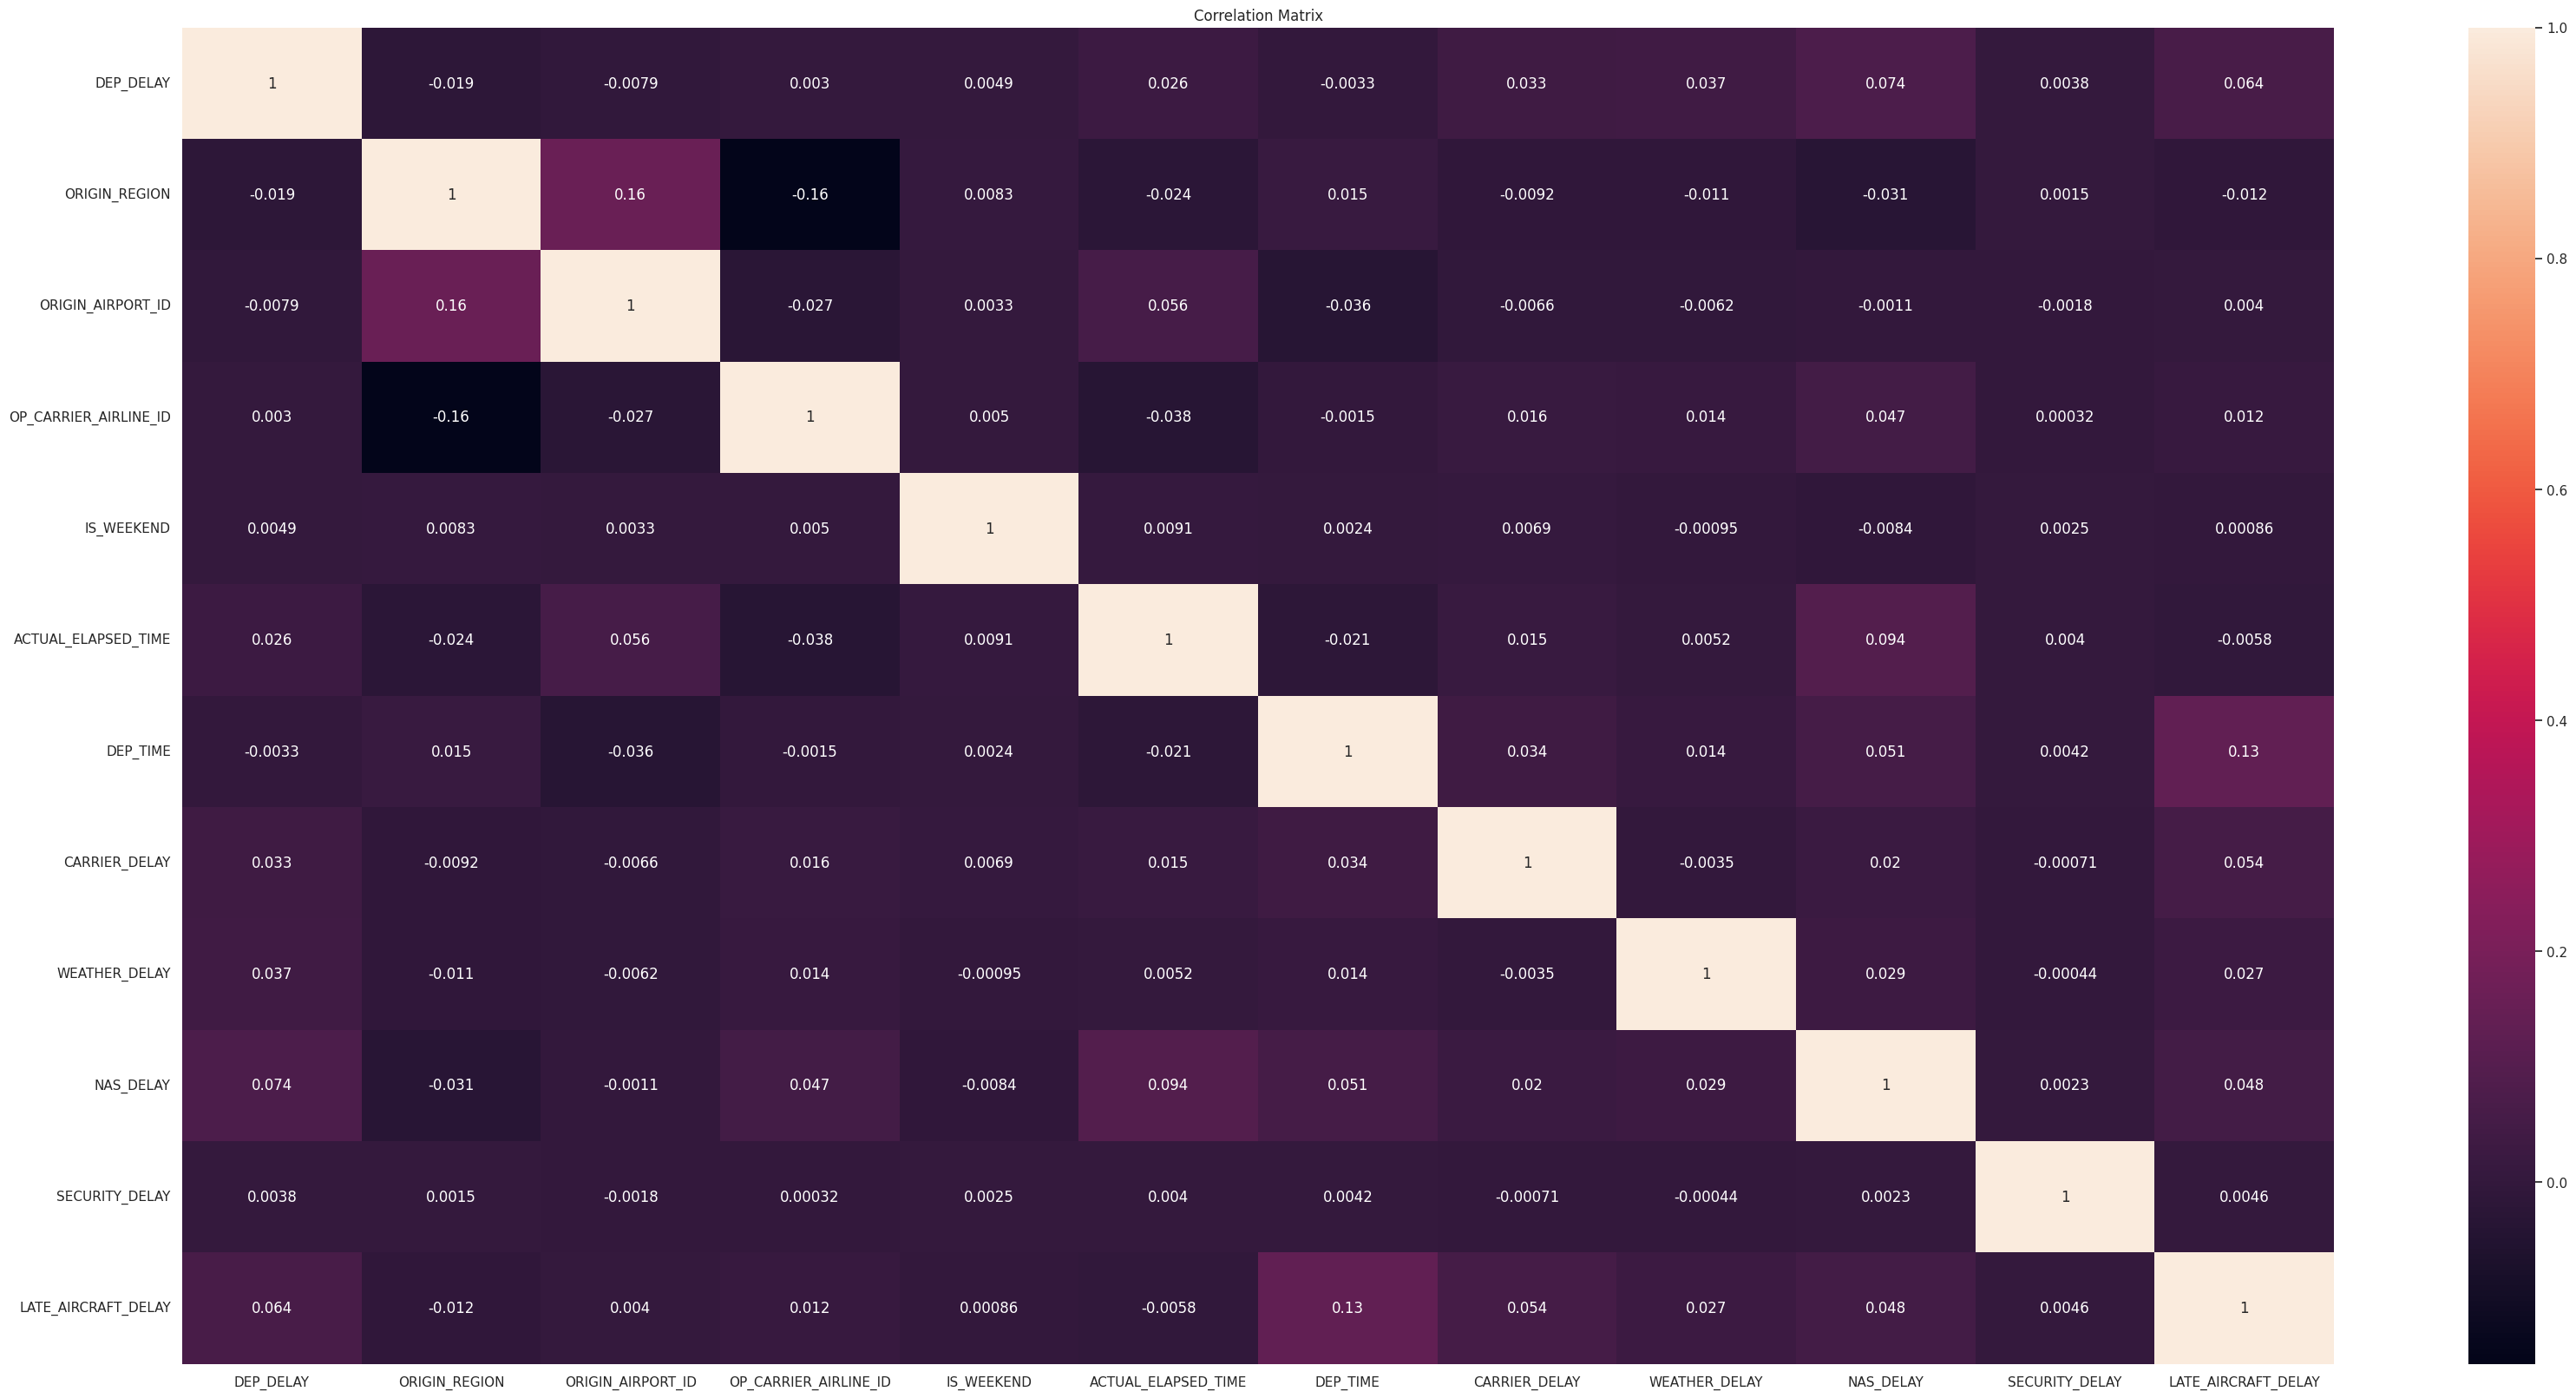

In [ ]:
# Create heatmap for dep_delay_training_df
heat_corr = dep_delay_training_df[['DEP_DELAY', 'ORIGIN_REGION', 'ORIGIN_AIRPORT_ID',
       'OP_CARRIER_AIRLINE_ID', 'IS_WEEKEND', 'ACTUAL_ELAPSED_TIME',
       'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].corr()

plt.figure(figsize=(40,20))
sns.set(rc={ 'figure.facecolor':'w'})
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")

# Save the heatmap as a PNG file
plt.savefig('/content/drive/My Drive/Plane_delay_work/dep_delay_correlation_heatmap.png', format='png')
plt.show()

In [ ]:
# Define the independent (X) and dependent (y) variables
X_train2 = dep_delay_training_df.drop(columns=['DEP_DELAY'])  # All columns except ARR_DELAY
y_train2 = dep_delay_training_df['DEP_DELAY']  # Target variable

# Create and train the model
X_train2 = sm.add_constant(X_train2)
model_dep = sm.OLS(y_train2, X_train2).fit()

# Print the summary
print(model_dep.summary())

                            OLS Regression Results                            
Dep. Variable:              DEP_DELAY   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                 5.720e+04
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        23:00:59   Log-Likelihood:            -2.6836e+08
No. Observations:            51678570   AIC:                         5.367e+08
Df Residuals:                51678558   BIC:                         5.367e+08
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.04

###  B. Test set
**BASE FOR THE TEST SET**


In [ ]:
# Create the DataFrame
dep_delay_testing_df = df_shift_testing[dep_delay_columns]


In [ ]:
X_test2 = dep_delay_testing_df.drop(columns=['DEP_DELAY'])  # All columns except ARR_DELAY
y_test2 = dep_delay_testing_df[['DEP_DELAY', 'OP_CARRIER_AIRLINE_ID']]  # Target variable

# Make constant
X_test2 = sm.add_constant(X_test2)

### Predict Delta Airline in 2023-2024 (high-end)

In [ ]:
# Filter the airline name
X_test_delta2 = X_test2[X_test2['OP_CARRIER_AIRLINE_ID']==19790]

In [ ]:
# Filter the airline name
y_test_delta2 = y_test2[y_test2['OP_CARRIER_AIRLINE_ID']==19790]

# Drop unncessary column
y_test_delta2 = y_test_delta2.drop(columns=['OP_CARRIER_AIRLINE_ID'])

In [ ]:
# Predict the value
y_pred_delta2 = model_dep.predict(X_test_delta2)

In [ ]:
# Filter the airline name
df_delta_test2 = dep_delay_testing_df[dep_delay_testing_df['OP_CARRIER_AIRLINE_ID']==19790]

In [ ]:
# Compare the actual and predicted values
df_concat3 = pd.concat([df_delta_test2, y_pred_delta2], axis=1)

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# View df
df_concat3.head()

,DEP_DELAY,ORIGIN_REGION,ORIGIN_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,IS_WEEKEND,ACTUAL_ELAPSED_TIME,DEP_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,0
3918,3.0,1.0,12953,19790,1,190.0,701.0,0.0,0.0,18.0,0.0,0.0,14.814066
3919,-6.0,3.0,13204,19790,1,216.0,1113.0,0.0,0.0,5.0,0.0,10.0,11.737931
3920,-2.0,2.0,13487,19790,1,217.0,1459.0,0.0,0.0,13.0,0.0,15.0,14.003335
3921,15.0,4.0,14107,19790,1,162.0,1850.0,0.0,0.0,0.0,0.0,0.0,7.134694
3922,-4.0,1.0,12953,19790,1,171.0,1118.0,0.0,0.0,0.0,0.0,0.0,10.393293


In [ ]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_delta2, y_pred_delta2))

Mean Squared Error (MSE): 2454.8086893129043


In [ ]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_delta2, y_pred_delta2))

Mean Absolute Error (MAE): 20.700813068956492


### Predict Frontier Airline in 2023-2024 (low-end)

In [ ]:
# Filter the airline name
X_test_frontier2 = X_test2[X_test2['OP_CARRIER_AIRLINE_ID']==20436]

In [ ]:
# Filter the airline name
y_test_frontier2 = y_test2[y_test2['OP_CARRIER_AIRLINE_ID']==20436]

# Drop unncessary column
y_test_frontier2 = y_test_frontier2.drop(columns=['OP_CARRIER_AIRLINE_ID'])

In [ ]:
# Predict the value
y_pred_frontier2 = model_dep.predict(X_test_frontier2)

In [ ]:
# Filter the airline name
df_frontier_test2 = dep_delay_testing_df[dep_delay_testing_df['OP_CARRIER_AIRLINE_ID']==20436]

In [ ]:
# Compare the actual and predicted values
df_concat4 = pd.concat([df_frontier_test2, y_pred_frontier2], axis=1)

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# View df
df_concat4.head()

,DEP_DELAY,ORIGIN_REGION,ORIGIN_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,IS_WEEKEND,ACTUAL_ELAPSED_TIME,DEP_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,0
5780,-2.0,2.0,11042,20436,1,140.0,1634.0,16.0,0.0,17.0,0.0,0.0,12.951095
5781,69.0,3.0,13204,20436,1,173.0,1240.0,0.0,0.0,45.0,0.0,0.0,17.714590
5782,69.0,3.0,13204,20436,1,110.0,1952.0,13.0,0.0,2.0,0.0,16.0,9.757942
5783,169.0,3.0,13495,20436,1,110.0,2120.0,0.0,0.0,17.0,0.0,24.0,12.801542
5784,-5.0,4.0,11292,20436,1,162.0,1750.0,0.0,0.0,19.0,0.0,24.0,14.138876


In [ ]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_frontier2, y_pred_frontier2))

Mean Squared Error (MSE): 3389.6363379733443


In [ ]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_frontier2, y_pred_frontier2))

Mean Absolute Error (MAE): 25.394613539550065


## 5. ARMA MODEL

**I have to use the average delay by month since my original data stores daily flights delay which would become too massive for the model to compute. To solve this, I used motnthly average delay to better comprehend the overall for ARMA.**

### A. Dependent variable: ARR_DELAY


In [21]:
#import the needed df
df_shift_train = pd.read_csv('/content/drive/My Drive/Plane_delay_work/data/training_data/df_shift_training.csv')
df_shift_test = pd.read_csv('/content/drive/My Drive/Plane_delay_work/data/testing_data/df_shift_testing.csv')

In [42]:
# Create copy
df_shift_training = df_shift_train.copy()
df_shift_testing = df_shift_test.copy()

In [45]:
# Create average df
avg_arr_delay_training = df_shift_training.groupby(
    ['ORIGIN_REGION', 'YEAR', 'MONTH']
)['ARR_DELAY'].mean().reset_index()

In [46]:
# View df
avg_arr_delay_training

,ORIGIN_REGION,YEAR,MONTH,ARR_DELAY
0,1.0,2014,1,18.722803
1,1.0,2014,2,15.482156
2,1.0,2014,3,5.276059
3,1.0,2014,4,5.571015
4,1.0,2014,5,5.628244
...,...,...,...,...
415,4.0,2022,7,7.903506
416,4.0,2022,8,7.276413
417,4.0,2022,9,3.892469
418,4.0,2022,11,4.778659


In [48]:
# Import package
from statsmodels.tsa.stattools import kpss

# Define the target variable
target_column = 'ARR_DELAY'

# Extract the series and drop missing values
check_stationary = avg_arr_delay_training[target_column].dropna()

# KPSS Test function
def kpss_test(series, regression='c'):
    statistic, p_value, n_lags, critical_values = kpss(series, regression=regression)
    print("KPSS Test Results:")
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags: {n_lags}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")
    if p_value < 0.05:
        print("\nThe series is likely non-stationary (reject H₀).")
    else:
        print("\nThe series is likely stationary (fail to reject H₀).")

# Run the KPSS test
kpss_test(check_stationary)


KPSS Test Results:
KPSS Statistic: 0.0509
p-value: 0.1000
Number of Lags: 10
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

The series is likely stationary (fail to reject H₀).


<Figure size 1000x600 with 0 Axes>

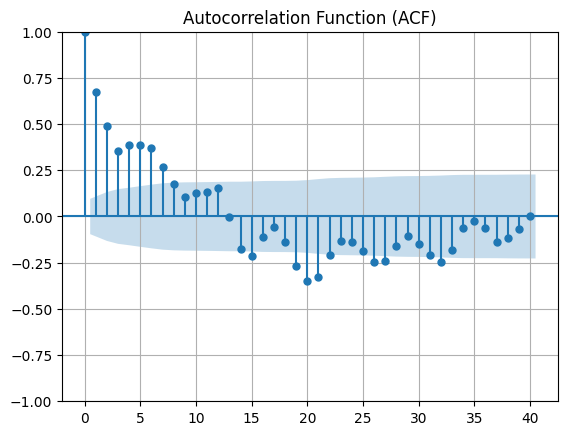

In [49]:
# Import package
from statsmodels.graphics.tsaplots import plot_acf

# Extract the 'Daily Return' column
endog = avg_arr_delay_training[target_column].dropna()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(endog, lags=40, title='Autocorrelation Function (ACF)', alpha=0.05)
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

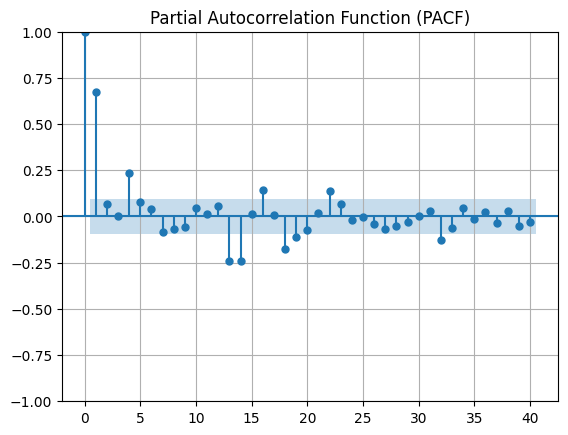

In [50]:
# Import package
from statsmodels.graphics.tsaplots import plot_pacf

# Extract the 'Daily Return' column
endog = avg_arr_delay_training[target_column].dropna()

# Plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(endog, lags=40, method='ywm', title='Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

                               SARIMAX Results                                
Dep. Variable:              ARR_DELAY   No. Observations:                  420
Model:                ARIMA(12, 0, 9)   Log Likelihood               -1171.736
Date:                Mon, 12 May 2025   AIC                           2389.472
Time:                        04:11:58   BIC                           2482.398
Sample:                             0   HQIC                          2426.201
                                - 420                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ORIGIN_REGION     1.0929      0.312      3.503      0.000       0.481       1.704
ar.L1             0.0142      0.335      0.042      0.966      -0.643       0.671
ar.L2            -0.2229      0.217     

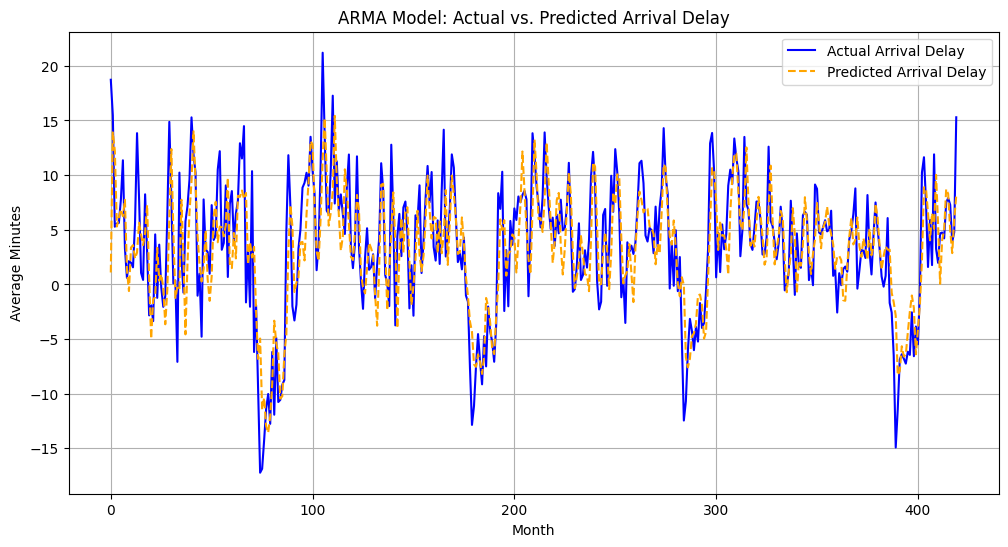

In [65]:
# Import package
from statsmodels.tsa.arima.model import ARIMA

# Set variables
endog = avg_arr_delay_training['ARR_DELAY']
exog = avg_arr_delay_training['ORIGIN_REGION']

# Fit ARIMAX model without constant trend
model = ARIMA(endog, exog=exog, order=(12, 0, 9), trend='n')  # Exclude constant trend
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=0, end=len(endog)-1, exog=exog)
avg_arr_delay_training.loc[endog.index, 'Predicted'] = predictions

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(endog.index, endog, label='Actual Arrival Delay', color='blue')
plt.plot(endog.index, avg_arr_delay_training.loc[endog.index, 'Predicted'], label='Predicted Arrival Delay', color='orange', linestyle='--')
plt.title(f'ARMA Model: Actual vs. Predicted Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Average Minutes')
plt.legend()
plt.grid()



### Interpation:
Ljung-Box (Q): Q = 0.18, Prob(Q) = 0.67
This test checks for autocorrelation in the residuals. A high p-value (> 0.05) suggests no significant autocorrelation, which is good for model validity.

Jarque-Bera (JB): JB = 2.81, Prob(JB) = 0.25
This test checks whether the residuals are normally distributed. A high p-value (> 0.05) suggests that the residuals are approximately normal.

Heteroskedasticity (H): H = 0.53, Prob(H) = 0.00
This tests for constant variance in the residuals. A significant result (p < 0.05) suggests heteroskedasticity, which might require further investigation.

Residual Statistics:
Skew: -0.02
A skew close to 0 indicates symmetric residuals.

Kurtosis: 3.40
A kurtosis value near 3 indicates residuals are close to normally distributed.

## Plot: Actual vs. Predicted Arrival Delay
The plot shows:

Blue Line: The actual arrival delay values over time.
Orange Dashed Line: The predicted arrival delay values from the ARIMAX model.
Observations:
The model captures the general trend and pattern of arrival delays reasonably well.
Some deviations occur, particularly during periods of extreme delay, which could indicate that the model struggles with capturing outliers or abrupt changes.

### B. Dependent variable: DEP_DELAY

In [59]:
# Create average df
avg_dep_delay_training = df_shift_training.groupby(
    ['DEST_REGION', 'YEAR', 'MONTH']
)['DEP_DELAY'].mean().reset_index()

In [60]:
# View df
avg_dep_delay_training

,DEST_REGION,YEAR,MONTH,DEP_DELAY
0,1.0,2014,1,20.169712
1,1.0,2014,2,16.186218
2,1.0,2014,3,10.922062
3,1.0,2014,4,12.040563
4,1.0,2014,5,15.294397
...,...,...,...,...
415,4.0,2022,7,12.658285
416,4.0,2022,8,11.858779
417,4.0,2022,9,8.283890
418,4.0,2022,11,9.001129


In [61]:
# Import package
from statsmodels.tsa.stattools import kpss

# Define the target variable
target_column = 'DEP_DELAY'

# Extract the series and drop missing values
check_stationary = avg_dep_delay_training[target_column].dropna()

# KPSS Test function
def kpss_test(series, regression='c'):
    statistic, p_value, n_lags, critical_values = kpss(series, regression=regression)
    print("KPSS Test Results:")
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags: {n_lags}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")
    if p_value < 0.05:
        print("\nThe series is likely non-stationary (reject H₀).")
    else:
        print("\nThe series is likely stationary (fail to reject H₀).")

# Run the KPSS test
kpss_test(check_stationary)

KPSS Test Results:
KPSS Statistic: 0.6302
p-value: 0.0199
Number of Lags: 10
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

The series is likely non-stationary (reject H₀).


<Figure size 1000x600 with 0 Axes>

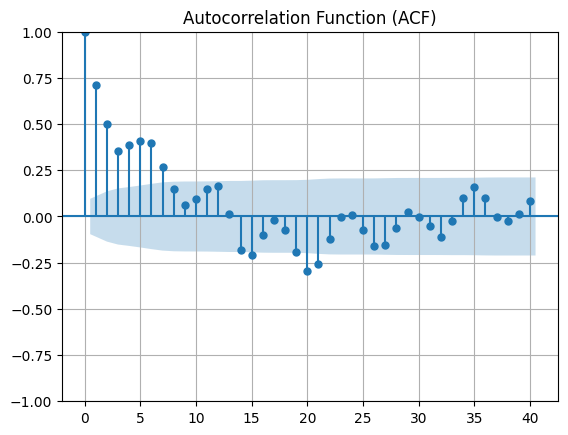

In [62]:
# Import package
from statsmodels.graphics.tsaplots import plot_acf

# Extract the 'Daily Return' column
endog = avg_dep_delay_training[target_column].dropna()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(endog, lags=40, title='Autocorrelation Function (ACF)', alpha=0.05)
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

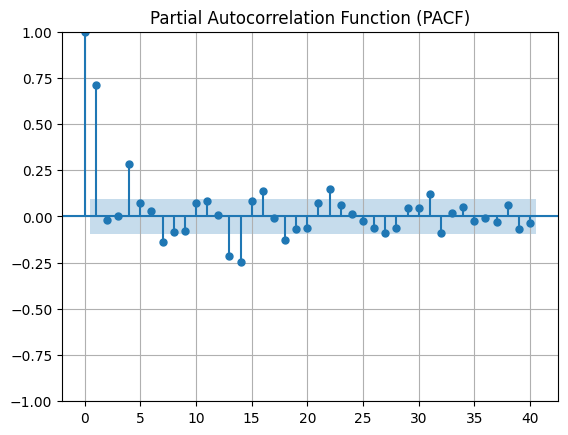

In [63]:
# Import package
from statsmodels.graphics.tsaplots import plot_pacf

# Extract the 'Daily Return' column
endog = avg_dep_delay_training[target_column].dropna()

# Plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(endog, lags=40, method='ywm', title='Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

                               SARIMAX Results                                
Dep. Variable:              DEP_DELAY   No. Observations:                  420
Model:                 ARIMA(9, 0, 9)   Log Likelihood               -1079.859
Date:                Mon, 12 May 2025   AIC                           2199.717
Time:                        04:12:04   BIC                           2280.523
Sample:                             0   HQIC                          2231.655
                                - 420                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
DEST_REGION     2.6896      0.975      2.758      0.006       0.778       4.601
ar.L1          -0.5321      0.118     -4.491      0.000      -0.764      -0.300
ar.L2           0.3372      0.108      3.112    

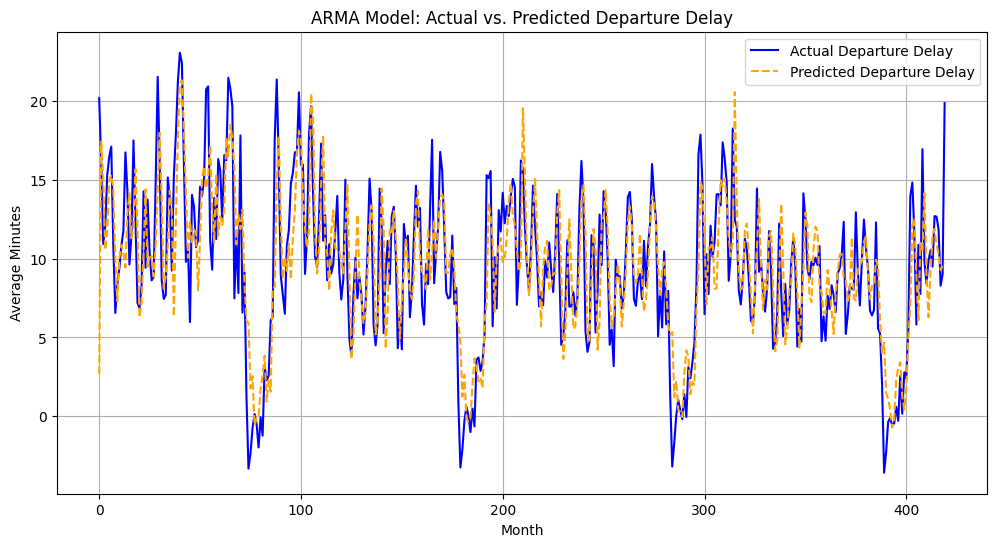

In [66]:
# Import package
from statsmodels.tsa.arima.model import ARIMA

# Set variables
endog = avg_dep_delay_training['DEP_DELAY']
exog = avg_dep_delay_training['DEST_REGION']

# Fit ARIMAX model without constant trend
model = ARIMA(endog, exog=exog, order=(9, 0, 9), trend='n')  # Exclude constant trend
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=0, end=len(endog)-1, exog=exog)
avg_arr_delay_training.loc[endog.index, 'Predicted'] = predictions

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(endog.index, endog, label='Actual Departure Delay', color='blue')
plt.plot(endog.index, avg_arr_delay_training.loc[endog.index, 'Predicted'], label='Predicted Departure Delay', color='orange', linestyle='--')
plt.title(f'ARMA Model: Actual vs. Predicted Departure Delay')
plt.xlabel('Month')
plt.ylabel('Average Minutes')
plt.legend()
plt.grid()


### Interpertation:
esidual Statistics:
Skew: 0.15
Close to zero, indicating that the residuals are fairly symmetric.
Kurtosis: 3.40
Near 3, suggesting that the residuals are close to a normal distribution.

### Plot: Actual vs. Predicted Departure Delay
Observations:
Blue Line: Actual departure delay values over time.
Orange Dashed Line: Predicted departure delay values from the ARIMAX model.
Interpretation:
The model tracks the overall trend and fluctuations in departure delays reasonably well, but there are some deviations during periods of extreme delay.
The orange dashed line (predicted values) aligns closely with the blue line (actual values), indicating that the model is effective at predicting the data.
Overall Interpretation
Model Fit:

The ARIMA(9, 0, 9) model provides a good fit for the data, with low AIC/BIC values.
The inclusion of the exogenous variable DEST_REGION improves the model's explanatory power.
Significant Variables:

The exogenous variable DEST_REGION and several AR/MA terms are statistically significant, contributing meaningfully to predicting departure delays.
Residual Diagnostics:

Residuals are free of significant autocorrelation (Ljung-Box test) and approximately normally distributed (Jarque-Bera test).
However, heteroskedasticity is present.
Prediction Performance:

The model performs well in predicting departure delays, as seen in the close alignment between actual and predicted values.
